# project

Use the "Run" button to execute the code.

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [5]:
# Execute this to save new versions of the notebook
jovian.commit(project="project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/imakashgusain/project


'https://jovian.ai/imakashgusain/project'

# Downloading the dataset
using `opendatasets` and download the dataset from Kaggle [ Gender recognition dataset ](https://www.kaggle.com/rashikrahmanpritom/gender-recognition-dataset)

In [4]:
!pip install opendatasets --upgrade --quiet

In [5]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/rashikrahmanpritom/gender-recognition-dataset'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: imakashgusain
Your Kaggle Key: ··········


100%|██████████| 220M/220M [00:01<00:00, 207MB/s]


In [6]:
dir = './gender-recognition-dataset'

In [7]:
import os
os.listdir(dir)

['Test', 'Train', 'Validation']

In [42]:
dir_train= './gender-recognition-dataset/Train/Train'
dir_validation= './gender-recognition-dataset/Test/Test'
dir_test= './gender-recognition-dataset/Validation'

# Import the dataset into pyTorch
## using `ImageFolder` class from `torchvision`

In [9]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torchvision.transforms as tt

In [43]:
Train_Dataset = ImageFolder(dir_train,tt.Compose([tt.Resize(64), tt.RandomCrop(64),tt.ToTensor()]))
Test_Dataset = ImageFolder(dir_test,tt.Compose([tt.Resize(64), tt.RandomCrop(64),tt.ToTensor()]))
Validation_Dataset = ImageFolder(dir_validation,tt.Compose([tt.Resize(64), tt.RandomCrop(64),tt.ToTensor()]))

In [44]:
len(Train_Dataset)

11135

In [45]:
len(Test_Dataset)

1039

In [46]:
len(Validation_Dataset)

1279

In [47]:
Train_Dataset[0]

(tensor([[[0.8510, 0.4627, 0.5647,  ..., 0.6706, 0.6431, 0.6157],
          [0.8549, 0.4784, 0.5843,  ..., 0.7451, 0.6941, 0.6392],
          [0.8431, 0.4824, 0.5961,  ..., 0.7882, 0.7176, 0.6471],
          ...,
          [0.7412, 0.7020, 0.7059,  ..., 0.3804, 0.3804, 0.4000],
          [0.7725, 0.7216, 0.6980,  ..., 0.2902, 0.2980, 0.3176],
          [0.8118, 0.7608, 0.7137,  ..., 0.1725, 0.1804, 0.2039]],
 
         [[0.9059, 0.5412, 0.6549,  ..., 0.7451, 0.7137, 0.6863],
          [0.9137, 0.5608, 0.6784,  ..., 0.8235, 0.7647, 0.7098],
          [0.9137, 0.5686, 0.6902,  ..., 0.8627, 0.7882, 0.7176],
          ...,
          [0.7490, 0.7020, 0.6980,  ..., 0.4588, 0.4627, 0.4824],
          [0.7804, 0.7216, 0.6902,  ..., 0.3647, 0.3765, 0.3961],
          [0.8196, 0.7608, 0.7020,  ..., 0.2510, 0.2588, 0.2824]],
 
         [[0.9059, 0.5373, 0.6510,  ..., 0.7412, 0.7137, 0.6863],
          [0.9137, 0.5529, 0.6667,  ..., 0.8235, 0.7647, 0.7098],
          [0.9137, 0.5608, 0.6784,  ...,

In [48]:
Train_Dataset.classes

['Female', 'Male']

0
torch.Size([3, 64, 64])


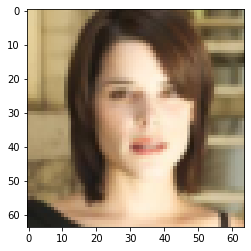

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
image , label = Train_Dataset[127]
plt.imshow(image.permute((1,2,0)))
print(label)
print(image.shape)

In [50]:
for cls in os.listdir(dir_train):
  print(cls , ': ', len(os.listdir(dir_train+'/' + cls)))

Male :  5924
Female :  5211


In [18]:
batch_size=128

In [19]:
from torch.utils.data.dataloader import DataLoader

In [51]:
train_dl = DataLoader(Train_Dataset, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(Validation_Dataset, batch_size*2, num_workers=4, pin_memory=True)
test_dl = DataLoader(Test_Dataset, batch_size*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [21]:
from torchvision.utils import make_grid

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape: torch.Size([128, 3, 64, 64])


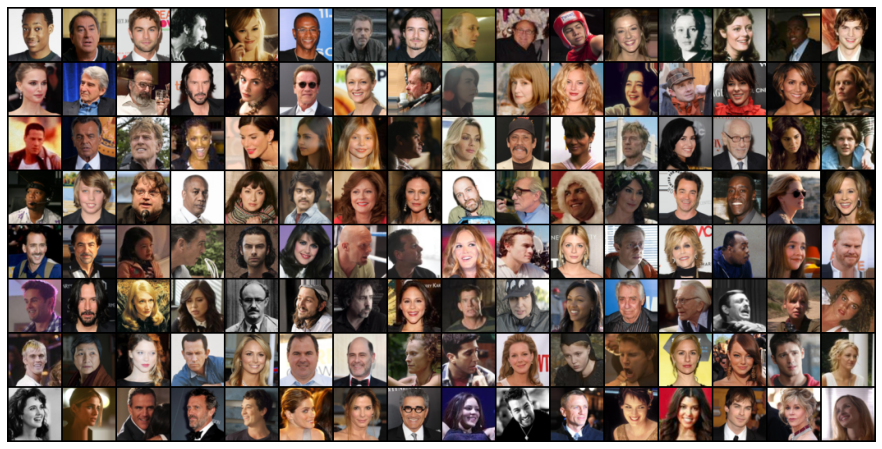

In [52]:
for images, _ in train_dl:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [23]:
jovian.commit(project="project")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/imakashgusain/project


'https://jovian.ai/imakashgusain/project'

In [24]:
import torch.nn as nn
import torch.nn.functional as F

In [53]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [54]:
class GenderPredictionCnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 32 x 32 x 32

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 16 x 16
            
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 8 x 8

            nn.Flatten(), 
            nn.Linear(256*8*8, 8192),
            nn.ReLU(),
            nn.Linear(8192, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 2))
        
    def forward(self, xb):
        return self.network(xb)

In [55]:
model = GenderPredictionCnnModel()
model

GenderPredictionCnnModel(
  (network): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=16384, out_features=8192, bias=True)
    (17): ReLU()
    (18): Linear

In [56]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape: torch.Size([128, 3, 64, 64])
out.shape: torch.Size([128, 2])
out[0]: tensor([-0.0094,  0.0421], grad_fn=<SelectBackward>)


In [31]:
import torch
torch.cuda.is_available()

True

In [32]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [33]:
device = get_default_device()
device

device(type='cuda')

In [57]:
train_dl = DeviceDataLoader(train_dl, device)
test_dl= DeviceDataLoader(test_dl,device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

In [35]:
jovian.commit(project="project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/imakashgusain/project


'https://jovian.ai/imakashgusain/project'

In [58]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [59]:
model = to_device(GenderPredictionCnnModel(), device)

In [60]:
evaluate(model, val_dl)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


{'val_acc': 0.6078125238418579, 'val_loss': 0.6888260245323181}

In [61]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [62]:
jovian.reset()
jovian.log_hyperparams({
    'num_epochs': num_epochs,
    'opt_func': opt_func.__name__,
    'batch_size': batch_size,
    'lr': lr,
})

[jovian] Hyperparams logged.


In [63]:
history = fit(num_epochs, lr, model, train_dl,val_dl, opt_func)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], train_loss: 0.6925, val_loss: 0.6817, val_acc: 0.6078
Epoch [1], train_loss: 0.6921, val_loss: 0.6567, val_acc: 0.6085
Epoch [2], train_loss: 0.5721, val_loss: 0.5039, val_acc: 0.7553
Epoch [3], train_loss: 0.4885, val_loss: 0.4738, val_acc: 0.7748
Epoch [4], train_loss: 0.4444, val_loss: 0.4314, val_acc: 0.8007
Epoch [5], train_loss: 0.4109, val_loss: 0.4027, val_acc: 0.8115
Epoch [6], train_loss: 0.3680, val_loss: 0.3613, val_acc: 0.8374
Epoch [7], train_loss: 0.3346, val_loss: 0.3416, val_acc: 0.8492
Epoch [8], train_loss: 0.3013, val_loss: 0.3529, val_acc: 0.8491
Epoch [9], train_loss: 0.2548, val_loss: 0.3599, val_acc: 0.8522


In [64]:
jovian.log_metrics(train_loss=history[-1]['train_loss'], 
                   val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'])

[jovian] Metrics logged.


In [65]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

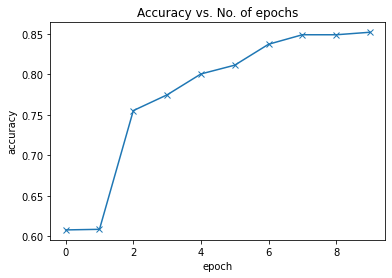

In [66]:
plot_accuracies(history)

In [67]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

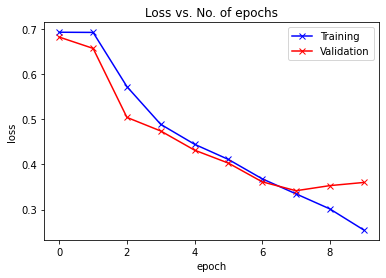

In [68]:
plot_losses(history)

In [69]:
jovian.commit(project="project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
Committed successfully! https://jovian.ai/imakashgusain/project


'https://jovian.ai/imakashgusain/project'

## Testing with individual images




In [77]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return Train_Dataset.classes[preds[0].item()]

Predicted: Male


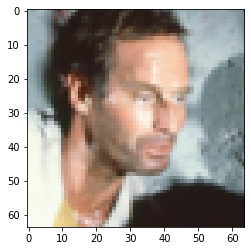

In [78]:
img, label =Test_Dataset[0]
plt.imshow(img.permute(1, 2, 0))
print( 'Predicted:', predict_image(img, model))

Predicted: Male


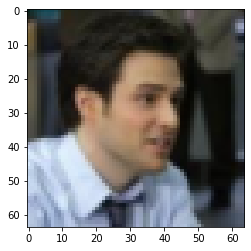

In [79]:
img, label =Test_Dataset[1002]
plt.imshow(img.permute(1, 2, 0))
print( 'Predicted:', predict_image(img, model))

Predicted: Female


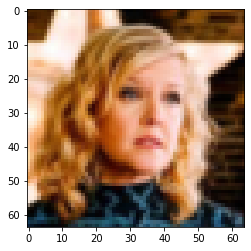

In [81]:
img, label =Test_Dataset[500]
plt.imshow(img.permute(1, 2, 0))
print( 'Predicted:', predict_image(img, model))

In [82]:
result = evaluate(model, test_dl)
result

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


{'val_acc': 0.4675520956516266, 'val_loss': 2.2235214710235596}

In [83]:
jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_acc'])

[jovian] Metrics logged.


In [84]:
torch.save(model.state_dict(), 'GenderClassification-cnn.pth')

In [85]:
jovian.commit(project="project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
Committed successfully! https://jovian.ai/imakashgusain/project


'https://jovian.ai/imakashgusain/project'